In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pdfminer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 34.4 MB/s 
     |████████████████████████████████| 2.3 MB 46.4 MB/s 
  Created wheel for pdfminer: filename=pdfminer-20191125-py3-none-any.whl size=6140091 sha256=5cc5a4c15c33a704b2b21e9631dab4343ad65ffb08bff931e6bc6ff440b69338
  Stored in directory: /root/.cache/pip/wheels/e3/5e/f4/d210b46e9e4a28229ea070ed5b3efa92c3c29d1a7918dd4b97
Successfully built pdfminer


In [ ]:
import re
from pdfminer.pdfpage import PDFPage
# from pdfminer.converter import TextConverter
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.layout import LAParams
from pdfminer.converter import PDFPageAggregator
import os

In [ ]:

def pdf_to_txt(filepath, outpath,filename):
    try:
        filepath=filepath+'/'+filename+'.pdf'
        outpath=outpath+'/'+filename+'.txt'
        fp = open(filepath, 'rb')
        outfp = open(outpath, 'w', encoding='utf-8')
        parser = PDFParser(fp)
        doc= PDFDocument(parser)
        if not doc.is_extractable:
            #raise PDFTextExtractionNotAllowed
            pass
        else:
            #创建PDf资源管理器
            resource = PDFResourceManager()
            #创建一个PDF参数分析器
            laparams = LAParams()
            #创建聚合器,用于读取文档的对象
            device = PDFPageAggregator(resource,laparams=laparams)
            #创建解释器，对文档编码，解释成Python能够识别的格式
            interpreter = PDFPageInterpreter(resource,device)
            # 循环遍历列表，每次处理一页的内容 doc.get_pages() 获取page列表
            for page in enumerate(PDFPage.create_pages(doc)):
                #利用解释器的process_page()方法解析读取单独页数
                interpreter.process_page(page[1])
                #使用聚合器get_result()方法获取内容
                layout = device.get_result()
                #这里layout是一个LTPage对象,里面存放着这个page解析出的各种对象
                for out in layout:
                    #判断是否含有get_text()方法，获取我们想要的文字
                    if hasattr(out,"get_text"):
                        text=out.get_text()
                        outfp.write(text+'\n')
            fp.close()
            outfp.close()
    except Exception as e:
         print (e)

In [ ]:
filepath='/content/drive/MyDrive/PDF de las palabras claves/Amazonia/21757-Texto del artículo-86012-1-10-20200204.pdf'
outpath='/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT/21757-Texto.txt'
pdf_to_txt(filepath, outpath)

In [ ]:
def abrir_txt_corpus(ruta_txt,nombre_txt):
  read_txt=ruta_txt+'/'+nombre_txt+".txt"
  with open(read_txt, "r") as fileTK:
    corpus = fileTK.read().replace("\n", "") # corpus is all the text in the file
    #docs=corpus.splitlines()
  return corpus

In [ ]:
!pip install python-slugify
!pip install unicode
!python -m spacy download es

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-11-10 23:50:53.370379: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 30.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
import nltk
import wordcloud
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
nlp = spacy.load('es_core_news_sm')
from nltk.stem import SnowballStemmer
from nltk.stem import *
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re
from slugify import slugify

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
final_stopwords = stopwords.words('spanish')
new_stopwords = ["si", "entonces", "junto", "aquel", "aquello", "ademas", "ello", "asi", "ahi", "aqui", "tambien",
                 "documento", "artículo", "tecnica", "técnicas", "enfoque", "document", "article", "method",
                 "approach", "technique", "issn", "tesis", "keyword", "keywords", "resumen","Resumen", "abstract",
                 "páginas", "pagina", "capitulo", "capítulo", "capítulos", "telefono", "correo", "introducción", "email",
                 "www", "org", "pe", "com", "día", "dia", "mes", "año","gob"
                ]
final_stopwords.extend(new_stopwords)
final_stopwords.extend(stopwords.words('english'))

In [ ]:
def limpieza_texto(ruta_txt_limpio, ruta_textos, nombre_txt):
    read_txt = ruta_textos + '/' + nombre_txt + ".txt"
    txt_content = open(read_txt, encoding="utf8", mode="r").read() # abrir_txt_corpus(ruta_textos, nombre_txt)
    print(read_txt)

    # limpieza de datos con expresiones regulares
    txt_content = txt_content.lower()
    txt_content = re.sub(r"((http|https):\/\/[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?)",
                         ' ', txt_content)  # links
    txt_content = re.sub(r'\S+@\S+', ' ', txt_content)  # emails
    txt_content = re.sub("(\/(\S)+)+", " ", txt_content)  # links cortados
    txt_content = re.sub('’s', '', txt_content)  # pertenencia ingles
    txt_content = re.sub('\[.*?\]', ' ', txt_content)  # texto en []
    txt_content = re.sub(r'[\d]', '', txt_content)  # eliminar numeros
    symb_punc = string.punctuation + "¿¡•“”«»©º’‘�…"
    txt_content = re.sub('[%s]' % re.escape(symb_punc), ' ', txt_content)  # signos de puntuacion
    txt_content = re.sub(' [ivx]+ ', ' ', txt_content)  # quitando numeros romanos
    txt_content = slugify(txt_content, separator=" ", regex_pattern=r'[^-a-z0-9%]+')  # tildes

    tokens = word_tokenize(txt_content, language="spanish")

    # quitar stopwords
    doc_tokens_clean = [word for word in tokens if word not in final_stopwords and len(word) > 2]
    # algoritmo para lemmatizar las palabras
    stemmer = SnowballStemmer('spanish')
    doc_tokens_stemmer = [stemmer.stem(x) for x in doc_tokens_clean]
    content = ' '.join(doc_tokens_stemmer)

    # para generar el txt limpio
    ruta_file_limpio = ruta_txt_limpio + '/' + nombre_txt + ".txt"
    file_tokens = open(ruta_file_limpio, encoding="utf-8", mode="w+")
    file_tokens.write(content)

In [ ]:
limpieza_texto("/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT-LIMPIOS","/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT","Inca Garcilaso de la Vega")

/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT/Inca Garcilaso de la Vega.txt


In [ ]:
from multiprocessing import Pool
import os
from os import path
from glob import glob

In [ ]:
from multiprocessing import Pool
import os
from glob import glob

def format_paths(list_paths):
    return [path.replace("\\", "/") for path in list_paths]


def get_path_files_by_extension(folder, extension):
    list_paths = glob(os.path.join(folder, "*.{}".format(extension)))
    return format_paths(list_paths)


def get_subfolder_files(db_folder, extension):
    tmp_list = []
    for file in os.listdir(db_folder):
        subfolder = os.path.join(db_folder, file)
        if os.path.isdir(subfolder):
            tmp_list += get_path_files_by_extension(subfolder, extension)
    return tmp_list


def get_list_filenames(list_paths):
    list_names = []
    for file in list_paths:
        filename = file.split("/")[-1]
        list_names += [filename[:-4]]
    return list_names


def process_pdf_file(in_data):
    pdf_to_txt(in_data[0], in_data[1], in_data[2])


def massive_processing_pdfs(db_folder, dst_folder_txt):
    list_files = get_subfolder_files(db_folder, "pdf")
    list_filenames = get_list_filenames(list_files)
    print("TOTAL PDFs: ", len(list_files))

    # Generating input for the pool
    info_proc = []
    for i, file in enumerate(list_files):
        filename = list_filenames[i]
        info_proc.append([file[:-1 * (len(filename) + 4) - 1], dst_folder_txt, filename])

    pool = Pool(os.cpu_count())
    pool.map(process_pdf_file, info_proc)


def process_txt_file(in_data):
    limpieza_texto(in_data[1], in_data[0], in_data[2])


def massive_processing_txts(db_folder_txt, dst_folder_txt2):
    list_files = get_path_files_by_extension(db_folder_txt, "txt")
    list_filenames = get_list_filenames(list_files)
    print("TOTAL TXTs: ", len(list_files))

    # Generating input for the pool
    info_proc = []
    for i, file in enumerate(list_files):
        filename = list_filenames[i]
        info_proc.append([db_folder_txt, dst_folder_txt2, filename])

    pool = Pool(os.cpu_count())
    pool.map(process_txt_file, info_proc)


def massive_processing(db_folder, dst_folder_txt, dst_folder_txt2):
    # massive_processing_pdfs(db_folder, dst_folder_txt)
    massive_processing_txts(dst_folder_txt, dst_folder_txt2)


In [ ]:
db_folder="/content/drive/MyDrive/PDF de las palabras claves"
dst_folder_txt="/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT"
db_folder_txt="/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT"
dst_folder_txt2="/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT-LIMPIOS"

In [ ]:
massive_processing_pdfs(db_folder, dst_folder_txt)
massive_processing_txts(db_folder_txt, dst_folder_txt2)


TOTAL PDFs:  109
argument of type 'NoneType' is not iterable
TOTAL TXTs:  82
/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT/Inca Garcilaso de la Vega.txt/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT/Anchante_aj.txt

/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT/4454-Texto del artículo-14699-2-10-20211227.txt
/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT/1044-Texto del artículo-7692-1-10-20201031.txt
/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT/1136-Texto del artículo-4536-1-10-20200203.txt
/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT/253T20190605_TC.txt
/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT/61-Texto del artículo-829-1-10-20190620.txt
/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT/Rosario_pe.txt
/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT/Martinez_lm - Resumen.txt
/content/drive/MyDrive/PDF de las palabras claves/

UnicodeDecodeError: ignored

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#corpus=abrir_txt_corpus("/content/drive/MyDrive/PDF de las palabras claves/PDF_TEXTOS_LIMPIOS","21757-Texto del artículo-86012-1-10-20200204")
#words_set = set()
def corpus_txt_limpios(ruta, nombres):
    corpus = []
    [corpus.append(abrir_txt_corpus(ruta, n)) for n in nombres]
    return corpus
#nombres_txt=["21757-Texto del artículo-86012-1-10-20200204","61-Texto del artículo-829-1-10-20190620","253T20190605_TC"]
#corpus=corpus_txt_limpios("/content/drive/MyDrive/PDF de las palabras claves/PDF_TEXTOS_LIMPIOS",nombres_txt)
#print(len(example_co))
#minimo con 3 aparacion de las palabras
def vector_tfidf(corpus,nombres_txt):
  stop = stopwords.words('spanish')
  tr_idf_model  = TfidfVectorizer(encoding="utf-8", min_df=3,stop_words=stop,lowercase=True,
    use_idf=True,smooth_idf=True)
  tf_idf_vector = tr_idf_model.fit_transform(corpus)
  tf_idf_array=tf_idf_vector.toarray()
  #print(tf_idf_array)
  words_set = tr_idf_model.get_feature_names_out()
  print(len(words_set))
  #[print(x) for x in words_set]
  df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set,index=nombres_txt)
  X=tf_idf_vector
  return X,tr_idf_model,df_tf_idf,tf_idf_vector

In [ ]:
def get_list_filenames(list_paths):
    list_names = []
    divider = "/"
    if len(list_paths) > 0:
        if "\\" in list_paths[0]:
            divider = "\\"
    for file in list_paths:
        filename = file.split(divider)[-1]
        list_names = list_names + [filename[:-4]]
    return list_names

In [ ]:
def find_ext(folder, ext):
    return glob(path.join(folder, "*.{}".format(ext)))


In [ ]:
nombres_miner=get_list_filenames(find_ext("/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT-LIMPIOS", "txt"))
corpus_miner=corpus_txt_limpios("/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT-LIMPIOS",nombres_miner)
X,tr_idf_model,vector_miner,tf_vector=vector_tfidf(corpus_miner,nombres_miner)
vector_miner

12158


,abad,abaj,abal,aban,abancay,aband,abander,abandon,abandonari,abarat,...,zevall,zol,zon,zoolog,zorr,zorrill,zos,zozobr,zul,zuloag
823-Texto del artículo-2110-1-10-20200330,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.006274,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
380-Texto del artículo-770-1-10-20161123,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.006315,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
398-Texto del artículo-806-1-10-20161123,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
130-Texto del artículo-269-1-10-20161119,0.000000,0.006719,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
251-Texto del artículo-5198-1-10-20211219,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.014554,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628-Texto del artículo-6356-2-10-20200108,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
993-Texto del artículo-5057-1-10-20220526,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.001908,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
253T20190605_TC,0.000218,0.000000,0.000033,0.0,0.000156,0.0,0.0,0.000211,0.000033,0.0,...,0.0,0.0,0.000091,0.0,0.00000,0.0,0.0,0.000099,0.0,0.0
62-Texto del artículo-210-1-10-20150901,0.000000,0.028768,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.07545,0.0,0.0,0.000000,0.0,0.0


In [ ]:
print(len(vector_miner))
print(nombres_miner)

72
['1044-Texto del artículo-7692-1-10-20201031', 'Inca Garcilaso de la Vega', '1136-Texto del artículo-4536-1-10-20200203', '4454-Texto del artículo-14699-2-10-20211227', 'Anchante_aj', '61-Texto del artículo-829-1-10-20190620', '253T20190605_TC', 'Martinez_lm - Resumen', 'Rosario_pe', '14603-Texto del artículo-58054-2-10-20160302', '3519-Texto del artículo-10351-1-10-20201229', 'MONOGRAFÍA - Aucatoma Moscoso, Jorge Luis - FCSyH', '251-Texto del artículo-5198-1-10-20211219', '380-Texto del artículo-770-1-10-20161123', 'UNFV_PaucarLimaylla_JosueCentella_Título Profesional_2019', 'HIpiesj', 'FLORES_MP', 'Filosofía y política en el Perú estudio del pensamiento de Víctor Raúl Haya de la Torre, José Carlos Mariátegui, Víctor Andrés Belaunde', '17017-Texto del artículo-67586-1-10-20170425', 'TS_CGZE_2019', 'Pérez_Luyo_Necesidad-nuevas-instituciones', 'Aguila_pa', '2016- 36 Construir instituciones y fortalecer el Estado peruano. SOSA, Paoloa', 'DI_FRANCO_OCHOA_CARLA_UN_P

In [ ]:
def get_columns_0_1(vector_tfidf):
  cont=0
  cont_1=0
  c_full=0
  names_col_0=[]
  names_col_i=[]
  print(vector_tfidf.shape[1])
  for col in vector_tfidf.columns:
      array_0=np.array(vector_tfidf.loc[: ,col].values,dtype=float)
      ce=np.count_nonzero(array_0)
      if(ce==0):
        cont+=1
      elif(ce==1):
        cont_1+=1
        names_col_0.append(col)
      else:
        c_full+=1
        names_col_i.append(col)
  return (names_col_0,names_col_i,cont,cont_1,c_full)

In [ ]:
(names_col_0,names_col_i,cont,cont_1,c_full) = get_columns_0_1(vector_miner)
print('columnas puro cero', cont)
print('columnas todo cero pero uun valor', cont_1)
print('columnas todo cero pero uun valor', c_full)


7886
columnas puro cero 0
columnas todo cero pero uun valor 0
columnas todo cero pero uun valor 7886


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def short_filenames(array_names):
  array_shortnames=[]
  for i in array_names:
    c=len(i)-2
    if(len(i)<=4):
       array_shortnames.append(i[:3])
    else:
      array_shortnames.append(i[:3]+i[c:])
  return array_shortnames

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def calculate_similarity(X, vectorizor, query, top_k=7):

    ''' Vectoriza la `consulta` mediante `vectorizor` y calcula la similitud del coseno de
    la `consulta` y `X` (todos los documentos) y devuelve los `top_k` documentos similares.'''

    # Vectorize the query to the same length as documents
    query_vec = vectorizor.transform(query)

    # Compute the cosine similarity between query_vec and all the documents
    cosine_similarities = cosine_similarity(X,query_vec).flatten()

    # Sort the similar documents from the most similar to less similar and return the indices
    most_similar_doc_indices = np.argsort(cosine_similarities, axis=0)[:-top_k-1:-1]

    return (most_similar_doc_indices, cosine_similarities)
def show_similar_documents(df, nombres, cosine_similarities, similar_doc_indices):

    '''Imprime los documentos más similares utilizando los índices del vector `indices_doc_similares`.'''
    nombres_f=short_filenames(nombres)
    counter = 1
    x=[]
    y=[]
    print(len(cosine_similarities))
    for index in similar_doc_indices:
        y.append(cosine_similarities[index])
        print('Top-{}, Similaridad = {}'.format(counter, cosine_similarities[index]))
        x.append(nombres_f[index])
        print('body: {}, '.format(nombres[index]))
        print()
        counter += 1
    plt.scatter(short_filenames(nombres),cosine_similarities,c='b')
    plt.scatter(x,y,c='r')
    plt.show()
    return nombres


Tiempo consumido: 4.29 ms

79
Top-1, Similaridad = 0.0
body: UNFV_PaucarLimaylla_JosueCentella_Título Profesional_2019, 

Top-2, Similaridad = 0.0
body: Rivera_cv, 

Top-3, Similaridad = 0.0
body: REYDECASTRO_ARENA_ALEJANDRO_ELPENSAMIENTO, 

Top-4, Similaridad = 0.0
body: PortocarreroFelipe2010, 

Top-5, Similaridad = 0.0
body: pensamiento político de gonzalez prada, 

Top-6, Similaridad = 0.0
body: 19727-Texto del artículo-78412-1-10-20180315, 

Top-7, Similaridad = 0.0
body: Rodriguez_cj, 



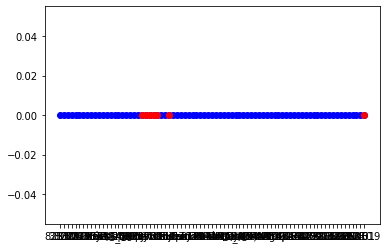

In [ ]:

import time
user_question = ['instituciones politicas']
search_start = time.time()
sim_vecs, cosine_similarities = calculate_similarity(X,tr_idf_model, user_question)
search_time = time.time() - search_start

print("Tiempo consumido: {:.2f} ms".format(search_time * 1000))
print()

nombres_archivos=show_similar_documents(corpus_miner, nombres_miner, cosine_similarities, sim_vecs)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
# Request function : search the top_n articles from a request ( request = string)
def search(tfidf_matrix,model,request, top_n = 5):
    request_transform = model.transform([request])
    similarity = np.dot(request_transform,np.transpose(tfidf_matrix))
    x = np.array(similarity.toarray()[0])
    indices=np.argsort(x)[-5:][::-1]
    return indices

# Find similar : get the top_n articles similar to an article
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]

# Print the result
def print_result(request_content,indices,X):
    print('\nsearch : ' + request_content)
    print('\nBest Results :')
    for i in indices:
        print("id", i)
        print("res ..", X[i])

In [ ]:
request = 'instituciones politicas'
#request = text_content[0]

result = search(tf_vector, tr_idf_model, request, top_n = 5)
print_result(request,result,nombres_miner)


search : instituciones politicas

Best Results :
id 78
res .. UNFV_PaucarLimaylla_JosueCentella_Título Profesional_2019
id 28
res .. Rivera_cv
id 21
res .. REYDECASTRO_ARENA_ALEJANDRO_ELPENSAMIENTO
id 22
res .. PortocarreroFelipe2010
id 23
res .. pensamiento político de gonzalez prada


In [ ]:
index = 71
result = find_similar(tf_vector, index, top_n = 10)

print_result('71 '+nombres_miner[index],result,nombres_miner)


search : 71 HIarcoma

Best Results :
id 48
res .. Diversidad Cultural
id 67
res .. BRAVO_BY
id 63
res .. 3528-Texto del artículo-10384-1-10-20201229
id 70
res .. TESIS 333 2014
id 44
res .. La diversidad cultural en el Perú
id 56
res .. MORON_DONAYRE_JES_SIGNOS
id 66
res .. Afrodescendientes1
id 53
res .. 2653-Texto del artículo-6443-1-10-20200108
id 21
res .. Aguila_pa
id 4
res .. Anchante_aj


['Inca Garcilaso de la Vega', '4454-Texto del artículo-14699-2-10-20211227', '1044-Texto del artículo-7692-1-10-20201031', '1136-Texto del artículo-4536-1-10-20200203', 'Anchante_aj', '61-Texto del artículo-829-1-10-20190620', '253T20190605_TC', 'Martinez_lm - Resumen', 'Rosario_pe', '3519-Texto del artículo-10351-1-10-20201229', 'MONOGRAFÍA - Aucatoma Moscoso, Jorge Luis - FCSyH', '14603-Texto del artículo-58054-2-10-20160302', '251-Texto del artículo-5198-1-10-20211219', 'HIpiesj', 'UNFV_PaucarLimaylla_JosueCentella_Título Profesional_2019', '380-Texto del artículo-770-1-10-20161123', 'Filosofía y política en el Perú estudio del pensamiento de Víctor Raúl Haya de la Torre, José Carlos Mariátegui, Víctor Andrés Belaunde', '17017-Texto del artículo-67586-1-10-20170425', 'Aguila_pa', 'FLORES_MP', 'Pérez_Luyo_Necesidad-nuevas-instituciones', 'TS_CGZE_2019', '2016- 36 Construir instituciones y fortalecer el Estado peruano. SOSA, Paoloa', 'DI_FRANCO_OCHOA_CARLA_UN_PALA

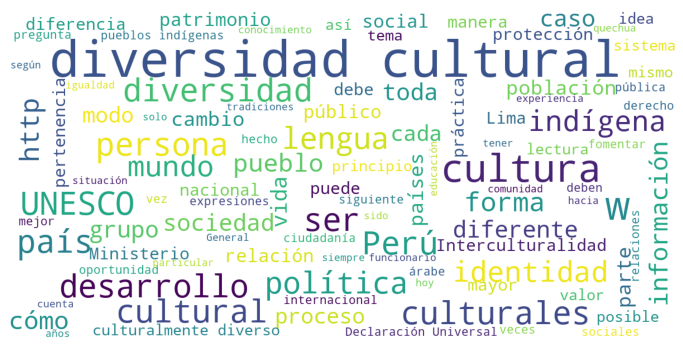

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
print(nombres_archivos)
corpus_grafico=abrir_txt_corpus("/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT","Diversidad Cultural")
#corpus_grafico2=abrir_txt_corpus("/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT","4454-Texto del artículo-14699-2-10-20211227")
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=final_stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(corpus_grafico)

In [ ]:
def get_relevant_documents(vector_tf_idf, keywords, stemmer=None):
    list_keywords = keywords.split(" ")
    selected_documents = pd.DataFrame()

    if stemmer is not None:
        for i in range(0, len(list_keywords)):
            list_keywords[i] = stemmer.stem(list_keywords[i])
    list_keywords = list(dict.fromkeys(list_keywords))
    print(list_keywords)
    list_keywords = [ word for word in list_keywords if word in vector_tf_idf.columns ]
    print(list_keywords)
    if len(list_keywords) > 0:
        selected_documents = vector_tf_idf[list_keywords]
        for word in list_keywords:
            selected_documents = selected_documents.loc[selected_documents[word] > 0]
        #tmp = tmp.sort_values(by=[list_keywords[0]], ascending=False)
        #print(selected_documents)
    return list(selected_documents.index.values), selected_documents

In [ ]:
lista,matriz=get_relevant_documents(vector_miner, "identidad cultural",SnowballStemmer("spanish"))
print(matriz)
print(len(matriz))

['ident', 'cultural']
['ident', 'cultural']
                                                       ident  cultural
Inca Garcilaso de la Vega                           0.005875  0.038339
4454-Texto del artículo-14699-2-10-20211227        0.004111  0.019162
1044-Texto del artículo-7692-1-10-20201031         0.039992  0.027960
Anchante_aj                                         0.005909  0.008263
61-Texto del artículo-829-1-10-20190620            0.003632  0.020315
253T20190605_TC                                     0.000021  0.000039
Rosario_pe                                          0.012531  0.017521
3519-Texto del artículo-10351-1-10-20201229        0.007129  0.006646
MONOGRAFÍA - Aucatoma Moscoso, Jorge Luis - FCSyH  0.002816  0.003938
HIpiesj                                             0.002167  0.006734
UNFV_PaucarLimaylla_JosueCentella_Título Profe...  0.001178  0.001647
380-Texto del artículo-770-1-10-20161123           0.005264  0.004907
Filosofía y política en el Peru